In [2]:
!pip install tushare
!pip install tqdm
import pandas as pd
import numpy as np
import tushare as ts
import os
from tqdm import tqdm
import glob
from datetime import datetime
import tushare as ts
ts.set_token('ce1d8f98f48f0c92fa70a66528612510f350b82ea565bc1abd45b5ac')
import numpy as np
import pandas as pd
from numpy import abs
from numpy import log
from numpy import sign
from scipy.stats import rankdata




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.1 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')
pro = ts.pro_api()
all_stock = pro.stock_basic()
price_PD_total = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/price_PD.csv', dtype = {'trade_date': 'str'})
price_PD_total = price_PD_total.drop_duplicates(['ts_code', 'trade_date']).sort_values(['ts_code', 'trade_date']).reset_index(drop=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
all_stock = all_stock[['ts_code','name','market','industry']]
price_PD_total = pd.merge(price_PD_total,all_stock,how='left',on='ts_code')
price_PD_total = price_PD_total[['ts_code', 'name','market','industry', 'trade_date', 'open', 'high', 'low',
       'close', 'pre_close','change', 'pct_chg', 'vol', 'amount']]


In [8]:
price_PD_total.head(10)

,ts_code,name,market,industry,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,平安银行,主板,银行,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
1,000001.SZ,平安银行,主板,银行,20190103,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2,000001.SZ,平安银行,主板,银行,20190104,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
3,000001.SZ,平安银行,主板,银行,20190107,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430
4,000001.SZ,平安银行,主板,银行,20190108,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795
5,000001.SZ,平安银行,主板,银行,20190109,9.74,10.08,9.70,9.94,9.66,0.28,2.8986,1233486.36,1229465.116
6,000001.SZ,平安银行,主板,银行,20190110,9.87,10.20,9.86,10.10,9.94,0.16,1.6097,1071817.66,1079711.035
7,000001.SZ,平安银行,主板,银行,20190111,10.11,10.22,10.05,10.20,10.10,0.10,0.9901,696364.55,708001.802
8,000001.SZ,平安银行,主板,银行,20190114,10.22,10.25,10.07,10.11,10.20,-0.09,-0.8824,500443.59,507862.882
9,000001.SZ,平安银行,主板,银行,20190115,10.11,10.28,10.09,10.24,10.11,0.13,1.2859,542160.55,553027.309


In [9]:
all_stock.head()

,ts_code,name,market,industry
0,000001.SZ,平安银行,主板,银行
1,000002.SZ,万科A,主板,全国地产
2,000004.SZ,*ST国华,主板,软件服务
3,000006.SZ,深振业A,主板,区域地产
4,000007.SZ,全新好,主板,其他商业


In [10]:
price_PD_total = price_PD_total[price_PD_total.market.isin(['主板','中小板','创业板'])]
price_PD_total = price_PD_total[~price_PD_total.name.str.contains('ST')].reset_index(drop=True)

In [11]:
price_PD_total

,ts_code,name,market,industry,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,平安银行,主板,银行,20190102,9.39,9.42,9.16,9.19,9.38,-0.19,-2.0256,539386.32,498695.109
1,000001.SZ,平安银行,主板,银行,20190103,9.18,9.33,9.15,9.28,9.19,0.09,0.9793,415537.95,384457.707
2,000001.SZ,平安银行,主板,银行,20190104,9.24,9.82,9.22,9.75,9.28,0.47,5.0647,1481159.06,1422149.888
3,000001.SZ,平安银行,主板,银行,20190107,9.84,9.85,9.63,9.74,9.75,-0.01,-0.1026,865687.66,841166.430
4,000001.SZ,平安银行,主板,银行,20190108,9.73,9.74,9.62,9.66,9.74,-0.08,-0.8214,402388.11,389247.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623338,605599.SH,菜百股份,主板,服饰,20250122,10.82,10.93,10.68,10.90,10.81,0.09,0.8326,23283.75,25166.036
5623339,605599.SH,菜百股份,主板,服饰,20250123,10.94,11.01,10.90,10.92,10.90,0.02,0.1835,20995.32,23006.947
5623340,605599.SH,菜百股份,主板,服饰,20250124,10.90,11.06,10.81,11.06,10.92,0.14,1.2821,23710.36,26041.582
5623341,605599.SH,菜百股份,主板,服饰,20250127,11.07,11.34,11.07,11.24,11.06,0.18,1.6275,32911.00,37024.684


In [12]:
price_PD_total['ret1'] = (price_PD_total.groupby('ts_code').pct_chg.shift(-1))/100+1


In [13]:
price_PD_total.shape

(5623343, 15)

In [15]:

daily_basic = pd.read_csv('/content/drive/MyDrive/alpha_python_202505/alpha_python_202505/data/daily_basic.csv', dtype = {'trade_date': 'str'})
daily_basic

,ts_code,trade_date,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,000001.SZ,20190102,0.3141,0.7088,0.99,6.8048,6.4428,0.7330,1.4917,1.4012,1.4799,1.4799,1.717041e+06,1.717025e+06,761029.0923,1.577961e+07,1.577946e+07
1,000001.SZ,20190103,0.2420,0.5460,0.76,6.8714,6.5059,0.7402,1.5063,1.4149,1.4655,1.4655,1.717041e+06,1.717025e+06,761029.0923,1.593414e+07,1.593399e+07
2,000001.SZ,20190104,0.8626,1.9463,2.87,7.2194,6.7456,0.7607,1.5825,1.4343,1.3949,1.3949,1.717041e+06,1.717025e+06,761029.0923,1.674115e+07,1.674099e+07
3,000001.SZ,20190107,0.5042,1.1375,1.19,7.2120,6.7386,0.7599,1.5809,1.4329,1.3963,1.3963,1.717041e+06,1.717025e+06,761029.0923,1.672398e+07,1.672382e+07
4,000001.SZ,20190108,0.2344,0.5287,0.52,7.1528,6.6833,0.7536,1.5679,1.4211,1.4079,1.4079,1.717041e+06,1.717025e+06,761029.0923,1.658662e+07,1.658646e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718158,920128.BJ,20250122,5.5613,5.5613,0.87,50.1866,48.6791,4.2442,3.9764,3.7950,NaN,NaN,8.119000e+03,1.710000e+03,1710.0000,2.277380e+05,4.796550e+04
6718159,920128.BJ,20250123,5.8266,5.8266,1.02,49.9898,48.4882,4.2276,3.9608,3.7802,NaN,NaN,8.119000e+03,1.710000e+03,1710.0000,2.268449e+05,4.777740e+04
6718160,920128.BJ,20250124,3.9659,3.9659,0.74,49.7393,48.2453,4.2064,3.9409,3.7612,NaN,NaN,8.119000e+03,1.710000e+03,1710.0000,2.257082e+05,4.753800e+04
6718161,920128.BJ,20250127,3.0706,3.0706,0.61,49.6856,48.1932,4.2018,3.9367,3.7572,NaN,NaN,8.119000e+03,1.710000e+03,1710.0000,2.254646e+05,4.748670e+04


In [16]:
price_PD_total = pd.merge(price_PD_total,daily_basic,how='left',on=['ts_code','trade_date'])


In [17]:
price_PD_total.shape

(5623343, 30)

In [18]:
price_PD_total.head()

,ts_code,name,market,industry,trade_date,open,high,low,close,pre_close,...,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,000001.SZ,平安银行,主板,银行,20190102,9.39,9.42,9.16,9.19,9.38,...,0.7330,1.4917,1.4012,1.4799,1.4799,1.717041e+06,1.717025e+06,761029.0923,1.577961e+07,1.577946e+07
1,000001.SZ,平安银行,主板,银行,20190103,9.18,9.33,9.15,9.28,9.19,...,0.7402,1.5063,1.4149,1.4655,1.4655,1.717041e+06,1.717025e+06,761029.0923,1.593414e+07,1.593399e+07
2,000001.SZ,平安银行,主板,银行,20190104,9.24,9.82,9.22,9.75,9.28,...,0.7607,1.5825,1.4343,1.3949,1.3949,1.717041e+06,1.717025e+06,761029.0923,1.674115e+07,1.674099e+07
3,000001.SZ,平安银行,主板,银行,20190107,9.84,9.85,9.63,9.74,9.75,...,0.7599,1.5809,1.4329,1.3963,1.3963,1.717041e+06,1.717025e+06,761029.0923,1.672398e+07,1.672382e+07
4,000001.SZ,平安银行,主板,银行,20190108,9.73,9.74,9.62,9.66,9.74,...,0.7536,1.5679,1.4211,1.4079,1.4079,1.717041e+06,1.717025e+06,761029.0923,1.658662e+07,1.658646e+07


In [19]:
price_PD_total.columns

Index(['ts_code', 'name', 'market', 'industry', 'trade_date', 'open', 'high',
       'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount',
       'ret1', 'turnover_rate', 'turnover_rate_f', 'volume_ratio', 'pe',
       'pe_ttm', 'pb', 'ps', 'ps_ttm', 'dv_ratio', 'dv_ttm', 'total_share',
       'float_share', 'free_share', 'total_mv', 'circ_mv'],
      dtype='object')

In [20]:
daily_info = {}
daily_info['open'] = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='open')
daily_info['close'] = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='close')
daily_info['high']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='high')
daily_info['low']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='low')
daily_info['vol']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='vol')
daily_info['amount']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='amount')
daily_info['vwap']  = (daily_info['amount']*1000)/(daily_info['vol']*100+1)
daily_info['pe_ttm']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='pe_ttm')
daily_info['total_mv']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='total_mv')
daily_info['pb']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='pb')
daily_info['turnover_rate']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='turnover_rate')
daily_info['volume_ratio']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='volume_ratio')
daily_info['dv_ttm']  = pd.pivot(price_PD_total,index='trade_date', columns='ts_code', values='dv_ttm')



In [21]:
daily_info['open']

ts_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,605507.SH,605555.SH,605566.SH,605567.SH,605577.SH,605580.SH,605588.SH,605589.SH,605598.SH,605599.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20190102,9.39,23.83,5.18,8.05,3.89,4.35,3.25,9.20,3.99,9.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190103,9.18,23.79,5.15,8.07,3.87,4.28,3.29,9.31,4.00,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190104,9.24,23.91,5.09,7.65,3.80,4.20,3.26,9.26,4.01,9.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190107,9.84,25.29,5.35,8.11,3.95,4.43,3.33,9.69,4.10,9.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190108,9.73,25.05,5.36,8.10,4.07,4.46,3.40,9.71,4.12,9.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20250122,11.32,7.27,7.10,7.03,2.61,8.64,2.92,8.50,4.90,10.30,...,19.63,24.00,18.68,8.59,13.70,11.50,43.18,26.52,22.11,10.82
20250123,11.17,7.15,7.16,7.01,2.59,8.65,2.79,8.13,4.93,10.14,...,19.83,23.72,18.60,8.42,13.70,11.50,43.55,26.95,22.05,10.94
20250124,11.32,7.33,6.89,6.97,2.57,8.54,2.76,8.03,4.95,10.09,...,20.20,24.24,18.98,8.45,13.61,11.25,42.00,26.33,21.48,10.90


In [22]:
def fun(x):
    if np.isnan(x):
        return np.nan
    else:
        return min(10,int(x*10)+1)


In [23]:
# daily_info['turnover_rate'].rank(axis=1)

In [24]:

class AlphaLib(object):
    def __init__(self, daily_info):
        self.open = daily_info['open']
        self.high = daily_info['high']
        self.low = daily_info['low']
        self.close = daily_info['close']
        self.vwap = daily_info['vwap']
        self.amount = daily_info['amount']

    def calcu_alpha(self):
        alpha_dict={}
        alpha_dict['alpha_pe']= -1*daily_info['pe_ttm']
        alpha_dict['alpha_total_mv']= daily_info['total_mv']
        alpha_dict['alpha_pb']= -1*daily_info['pb']
        alpha_dict['alpha_turnover_rate']= daily_info['turnover_rate']
        alpha_dict['alpha_volume_ratio']= daily_info['volume_ratio']
        alpha_dict['alpha_vwap']= daily_info['vwap']
        alpha_dict['alpha_dv_ttm']= -1*daily_info['dv_ttm']
#         alpha_dict['alpha_reverse']= -daily_info['close'].diff(2)


        ## 多因子
        alpha_dict['alpha_cmb']= 4*alpha_dict['alpha_turnover_rate'].rank(axis=1)+\
                                alpha_dict['alpha_total_mv'].rank(axis=1)+\
                                alpha_dict['alpha_pb'].rank(axis=1)+\
                                alpha_dict['alpha_pe'].rank(axis=1)+\
                                alpha_dict['alpha_vwap'].rank(axis=1)

        return alpha_dict


In [25]:
tmp_class = AlphaLib(daily_info)
alpha_dict = tmp_class.calcu_alpha()

In [26]:
alpha_dict.keys()

dict_keys(['alpha_pe', 'alpha_total_mv', 'alpha_pb', 'alpha_turnover_rate', 'alpha_volume_ratio', 'alpha_vwap', 'alpha_dv_ttm', 'alpha_cmb'])

In [27]:
alpha = alpha_dict['alpha_cmb'].unstack().reset_index().rename(columns={0:'factor'})
alpha

,ts_code,trade_date,factor
0,000001.SZ,20190102,13737.0
1,000001.SZ,20190103,12448.0
2,000001.SZ,20190104,16380.0
3,000001.SZ,20190107,13340.0
4,000001.SZ,20190108,11981.0
...,...,...,...
6402970,605599.SH,20250122,10643.0
6402971,605599.SH,20250123,10208.0
6402972,605599.SH,20250124,10389.0
6402973,605599.SH,20250127,10816.0


In [28]:
alpha = pd.merge(alpha, price_PD_total[['trade_date', \
        'ts_code','ret1','industry']], how='left', on=['trade_date', 'ts_code'])

In [29]:
alpha['factor_rank'] = alpha.groupby(['trade_date','industry']).factor.rank(pct=True)


In [30]:
alpha

,ts_code,trade_date,factor,ret1,industry,factor_rank
0,000001.SZ,20190102,13737.0,1.009793,银行,0.678571
1,000001.SZ,20190103,12448.0,1.050647,银行,0.551724
2,000001.SZ,20190104,16380.0,0.998974,银行,0.655172
3,000001.SZ,20190107,13340.0,0.991786,银行,0.620690
4,000001.SZ,20190108,11981.0,1.028986,银行,0.586207
...,...,...,...,...,...,...
6402970,605599.SH,20250122,10643.0,1.001835,服饰,0.093023
6402971,605599.SH,20250123,10208.0,1.012821,服饰,0.093023
6402972,605599.SH,20250124,10389.0,1.016275,服饰,0.093023
6402973,605599.SH,20250127,10816.0,0.959964,服饰,0.069767


In [31]:
alpha['factor_rank_bin'] = alpha.factor_rank.apply(fun)

In [32]:
alpha.factor_rank_bin.value_counts()

,count
factor_rank_bin,
10.0,558665
6.0,498108
9.0,478919
3.0,478607
7.0,478294
2.0,461847
8.0,461501
4.0,461232
5.0,445165


<Axes: xlabel='trade_date'>

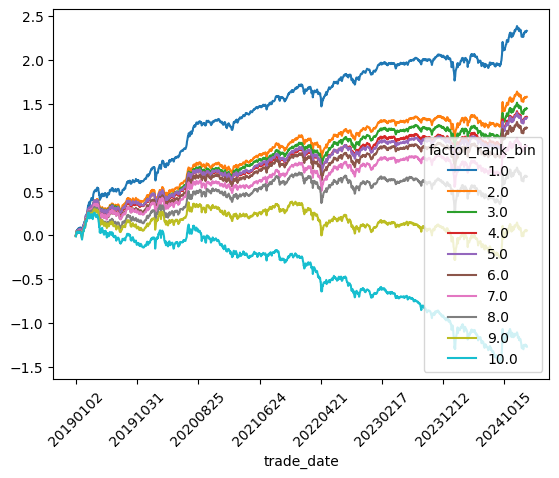

In [33]:
(alpha.groupby(['factor_rank_bin', \
        'trade_date']).ret1.mean()-1).unstack().T.cumsum().plot(rot=45)

<Axes: xlabel='trade_date'>

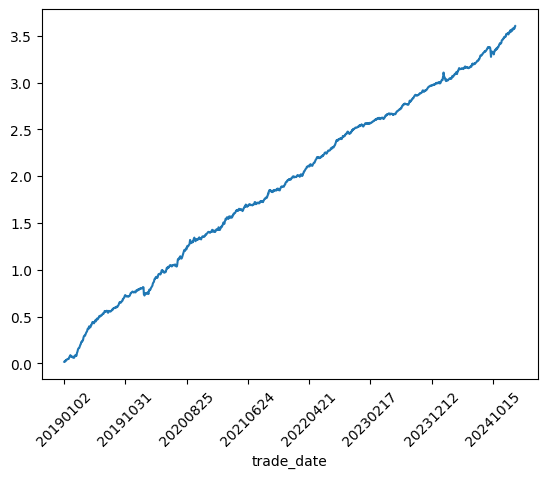

In [34]:
long_ret = (alpha[(alpha.factor_rank_bin == 1)].groupby('trade_date').ret1.mean()-1).cumsum()
short_ret = (alpha[(alpha.factor_rank_bin == 10)].groupby('trade_date').ret1.mean()-1).cumsum()
(long_ret - short_ret).plot(rot=45)

In [35]:
ret_PD = (alpha.groupby(['factor_rank_bin', 'trade_date']).ret1.mean()-1.00).unstack().T

if ret_PD[1].mean()>ret_PD[10].mean():
    ret_PD['diff'] = ret_PD[1] - ret_PD[10]
else:
    ret_PD['diff'] = ret_PD[10] - ret_PD[1]


In [36]:
def max_dd(returns):
    r = returns.cumsum()+1
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = returns.index[dd.argmin()]
    start = returns.index[r.loc[:end].argmax()]
    return mdd, start, end


def calc_pfmc(ret_PD):
    performance = []
    for i in [1,2,3,4,5,6,7,8,9,10,'diff']:
        returnlist = ret_PD[i]
        ret_year = (returnlist.mean()-0)*252
        ret_sharpe = (returnlist.mean()-0)/returnlist.std()*(252**0.5)
        max_draw, start, end = max_dd(returnlist)
        winratio = (returnlist>0).sum()/len(returnlist)
        std = returnlist.std()
        performance.append([i,ret_year,ret_sharpe,std,winratio,max_draw])
    performance = pd.DataFrame(performance,columns = ['group_name','return','sharpe',\
                    'std','winratio','mdd'])
    return performance

calc_pfmc(ret_PD)

,group_name,return,sharpe,std,winratio,mdd
0,1,0.398461,1.867703,0.013439,0.590508,-0.096924
1,2,0.269718,1.263832,0.013444,0.568814,-0.126479
2,3,0.247137,1.131781,0.013755,0.562034,-0.133804
3,4,0.230567,1.022207,0.014209,0.556610,-0.147745
4,5,0.228721,0.992549,0.014516,0.553220,-0.153835
5,6,0.209338,0.884596,0.014907,0.543729,-0.163821
6,7,0.173961,0.707488,0.015489,0.541695,-0.191834
7,8,0.114235,0.447758,0.016071,0.532203,-0.265379
8,9,0.008921,0.034115,0.016472,0.523390,-0.479956
9,10,-0.217698,-0.823510,0.016653,0.486780,-1.356323


<Axes: xlabel='trade_date'>

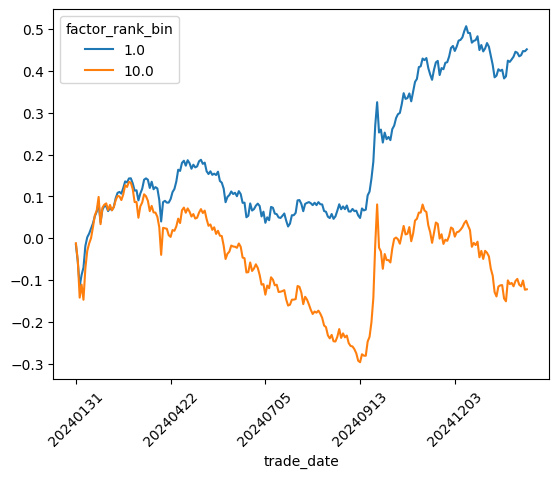

In [37]:
(alpha.groupby(['factor_rank_bin', \
        'trade_date']).ret1.mean()-1).unstack().T.tail(240).cumsum()[[1,10]].plot(rot=45)